In [1]:
from plotting import Plotting
from data_gen import FrankeDataGen, TerrainDataGen

import matplotlib.pyplot as plt
import json

### Plotting source data

In [2]:
data_points = 41

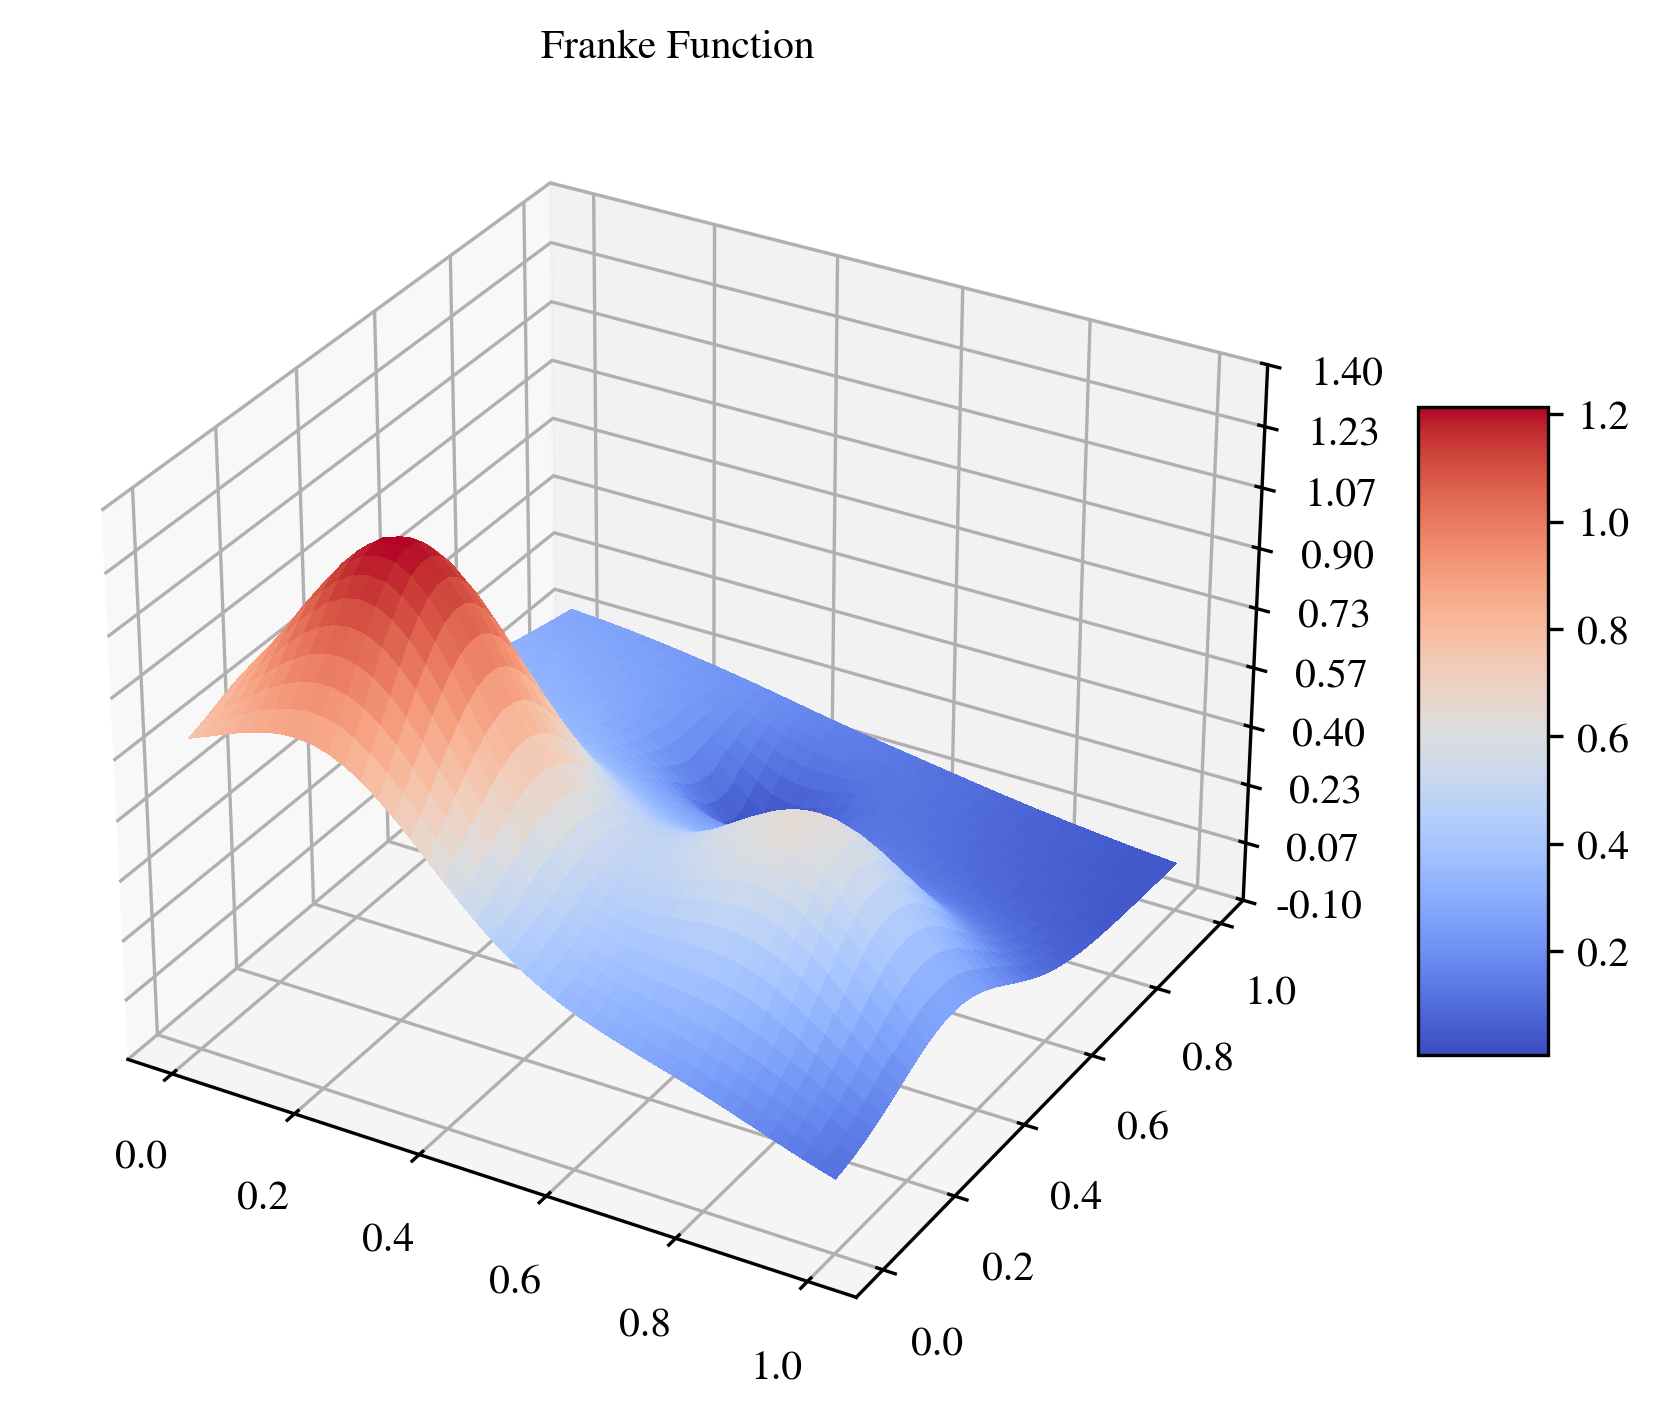

In [3]:
data = FrankeDataGen(data_points = data_points)
data.plot_data(save_path="../figures/figures_in_report/franke_func.pdf")

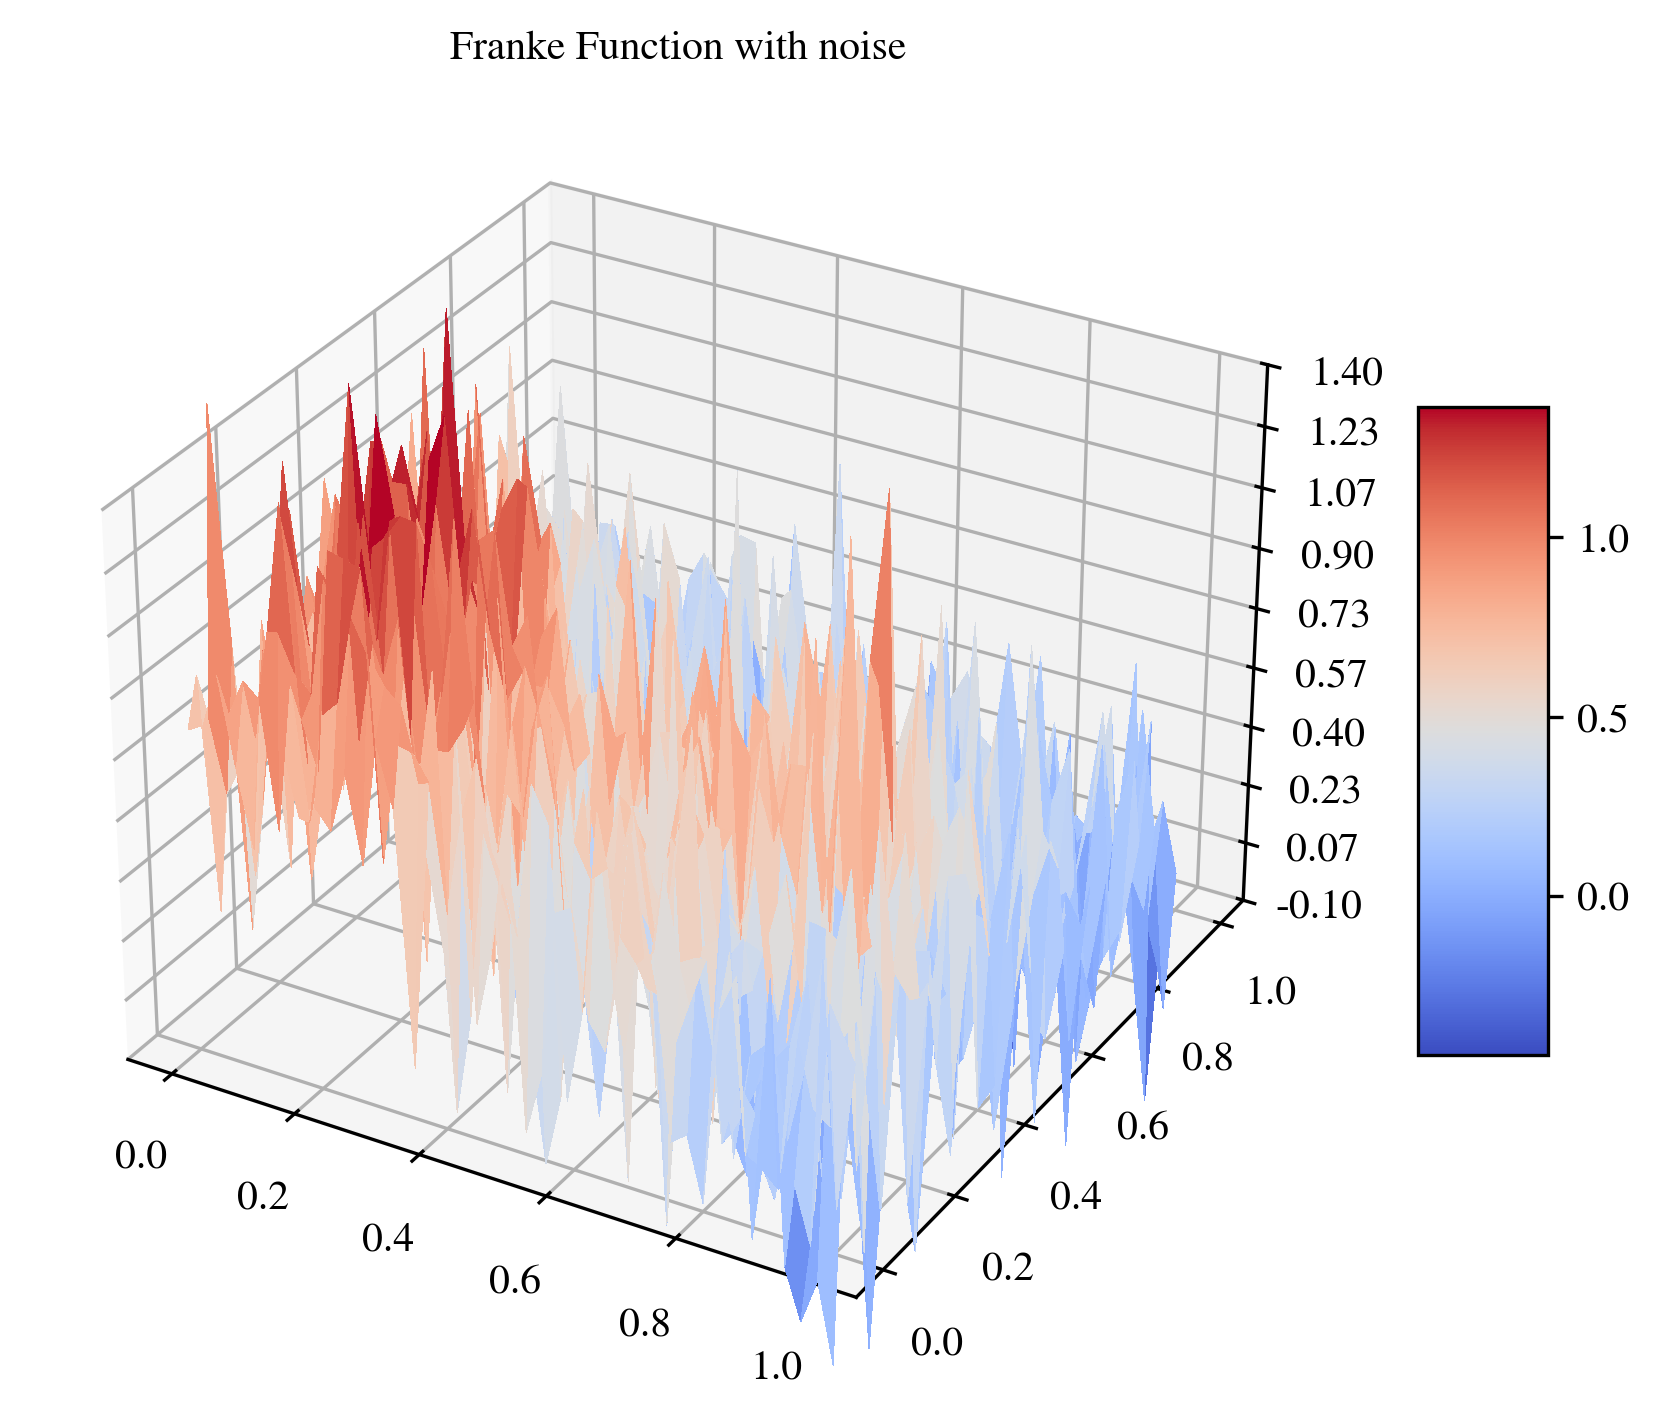

In [4]:
data = FrankeDataGen(data_points = data_points, noise=True)
data.plot_data(save_path="../figures/figures_in_report/franke_func_noise.pdf")

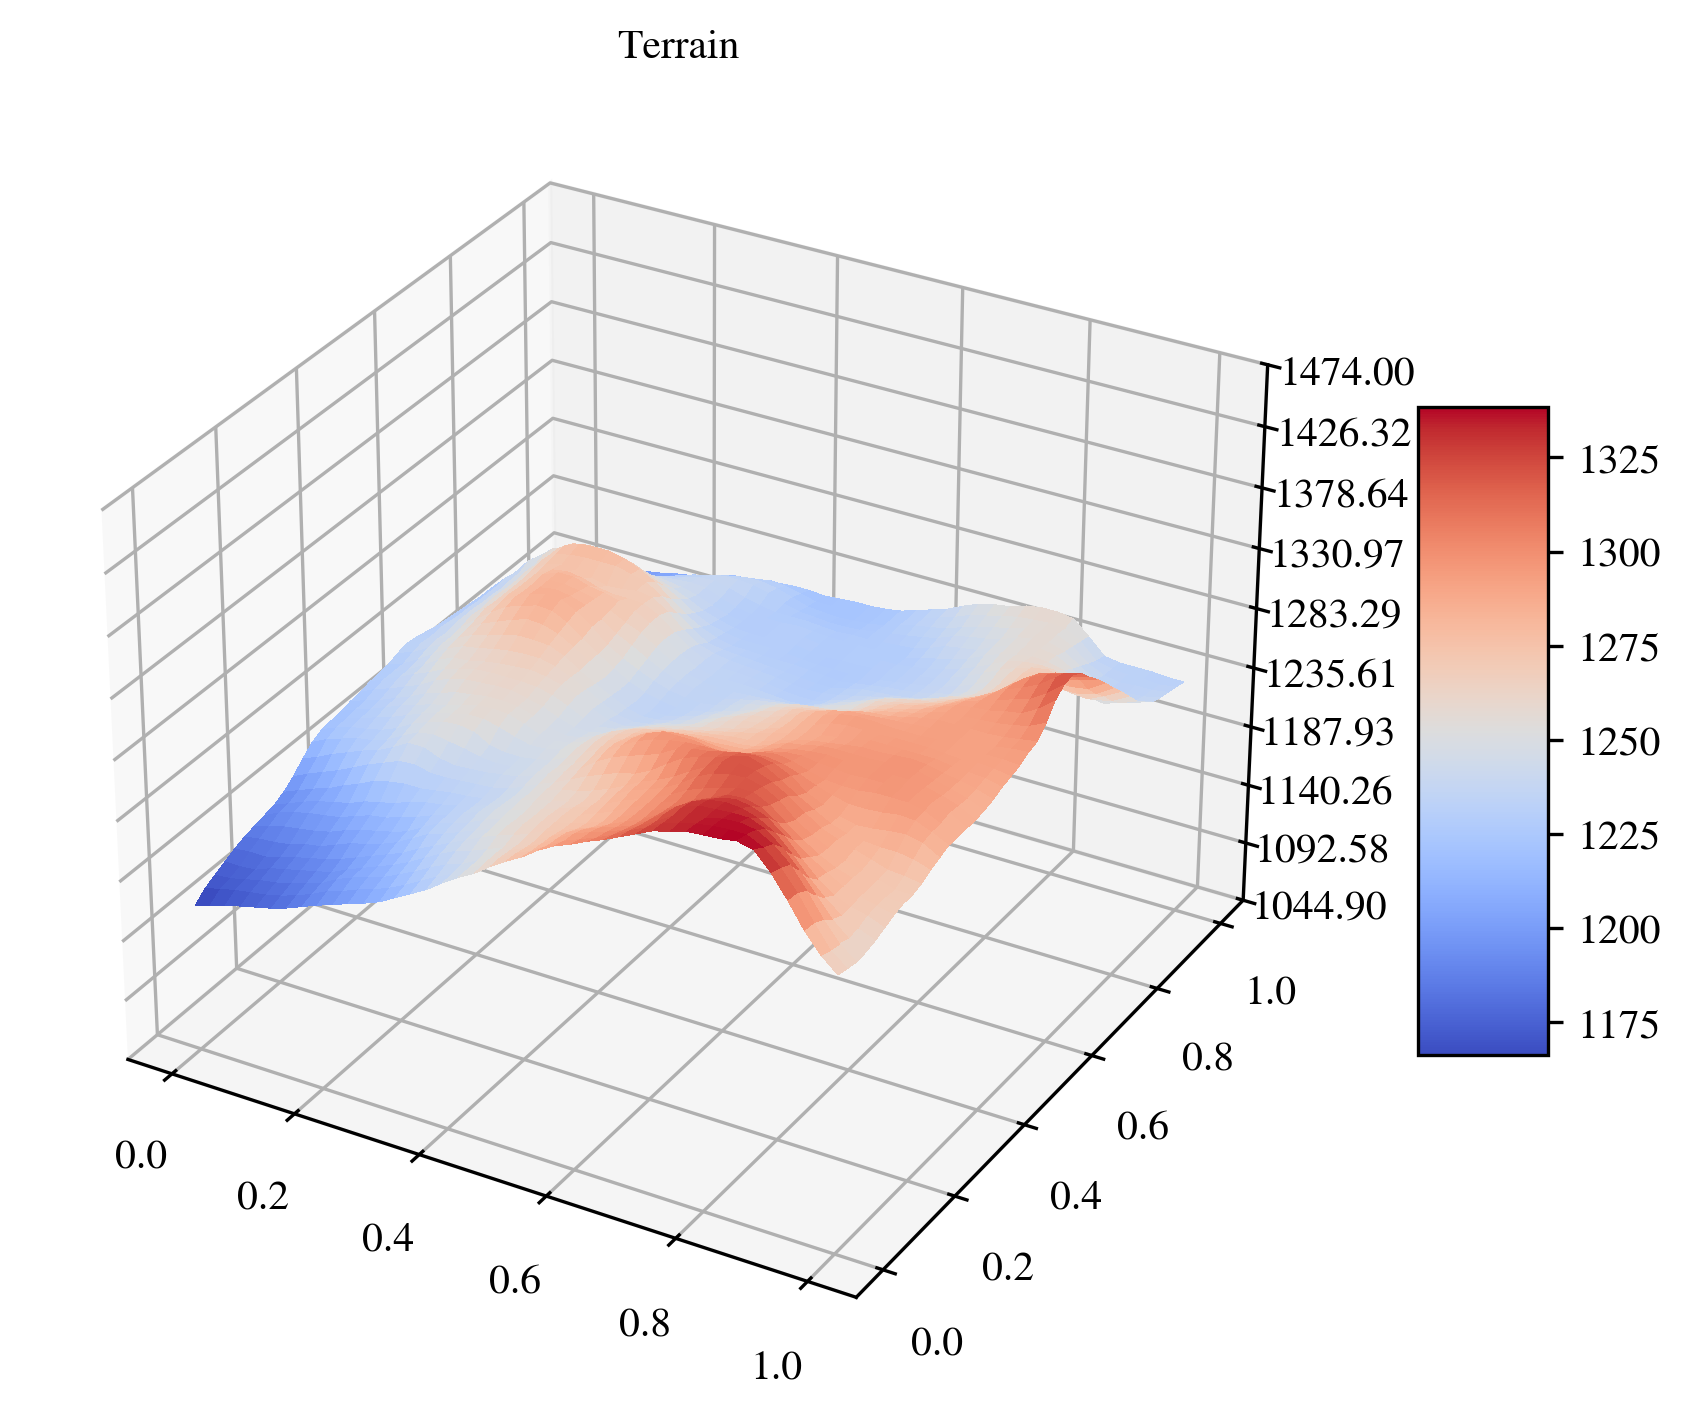

In [5]:
data = TerrainDataGen(data_points = data_points)
data.plot_data(save_path="../figures/figures_in_report/terrain_41.pdf")

### Franke function

In [6]:
plots = Plotting(data_points=data_points, data="Franke_Noise", seed=12)

In [7]:
#loading paramters fiund from grid search

with open('best_params.json', 'r') as f: 
    best_params = json.load(f)

best_lambda_lasso = best_params["best_params_lasso_franke"]["best_lambda"]
best_deg_lasso = best_params["best_params_lasso_franke"]["best_degree"]

best_lambda_ridge = best_params["best_params_ridge_franke"]["best_lambda"]
best_deg_ridge = best_params["best_params_ridge_franke"]["best_degree"]

best_lambda_lasso_terrain = best_params["best_params_lasso_terrain"]["best_lambda"]
best_deg_lasso_terrain = best_params["best_params_lasso_terrain"]["best_degree"]

best_lambda_ridge_terrain = best_params["best_params_ridge_terrain"]["best_lambda"]
best_deg_ridge_terrain = best_params["best_params_ridge_terrain"]["best_degree"]

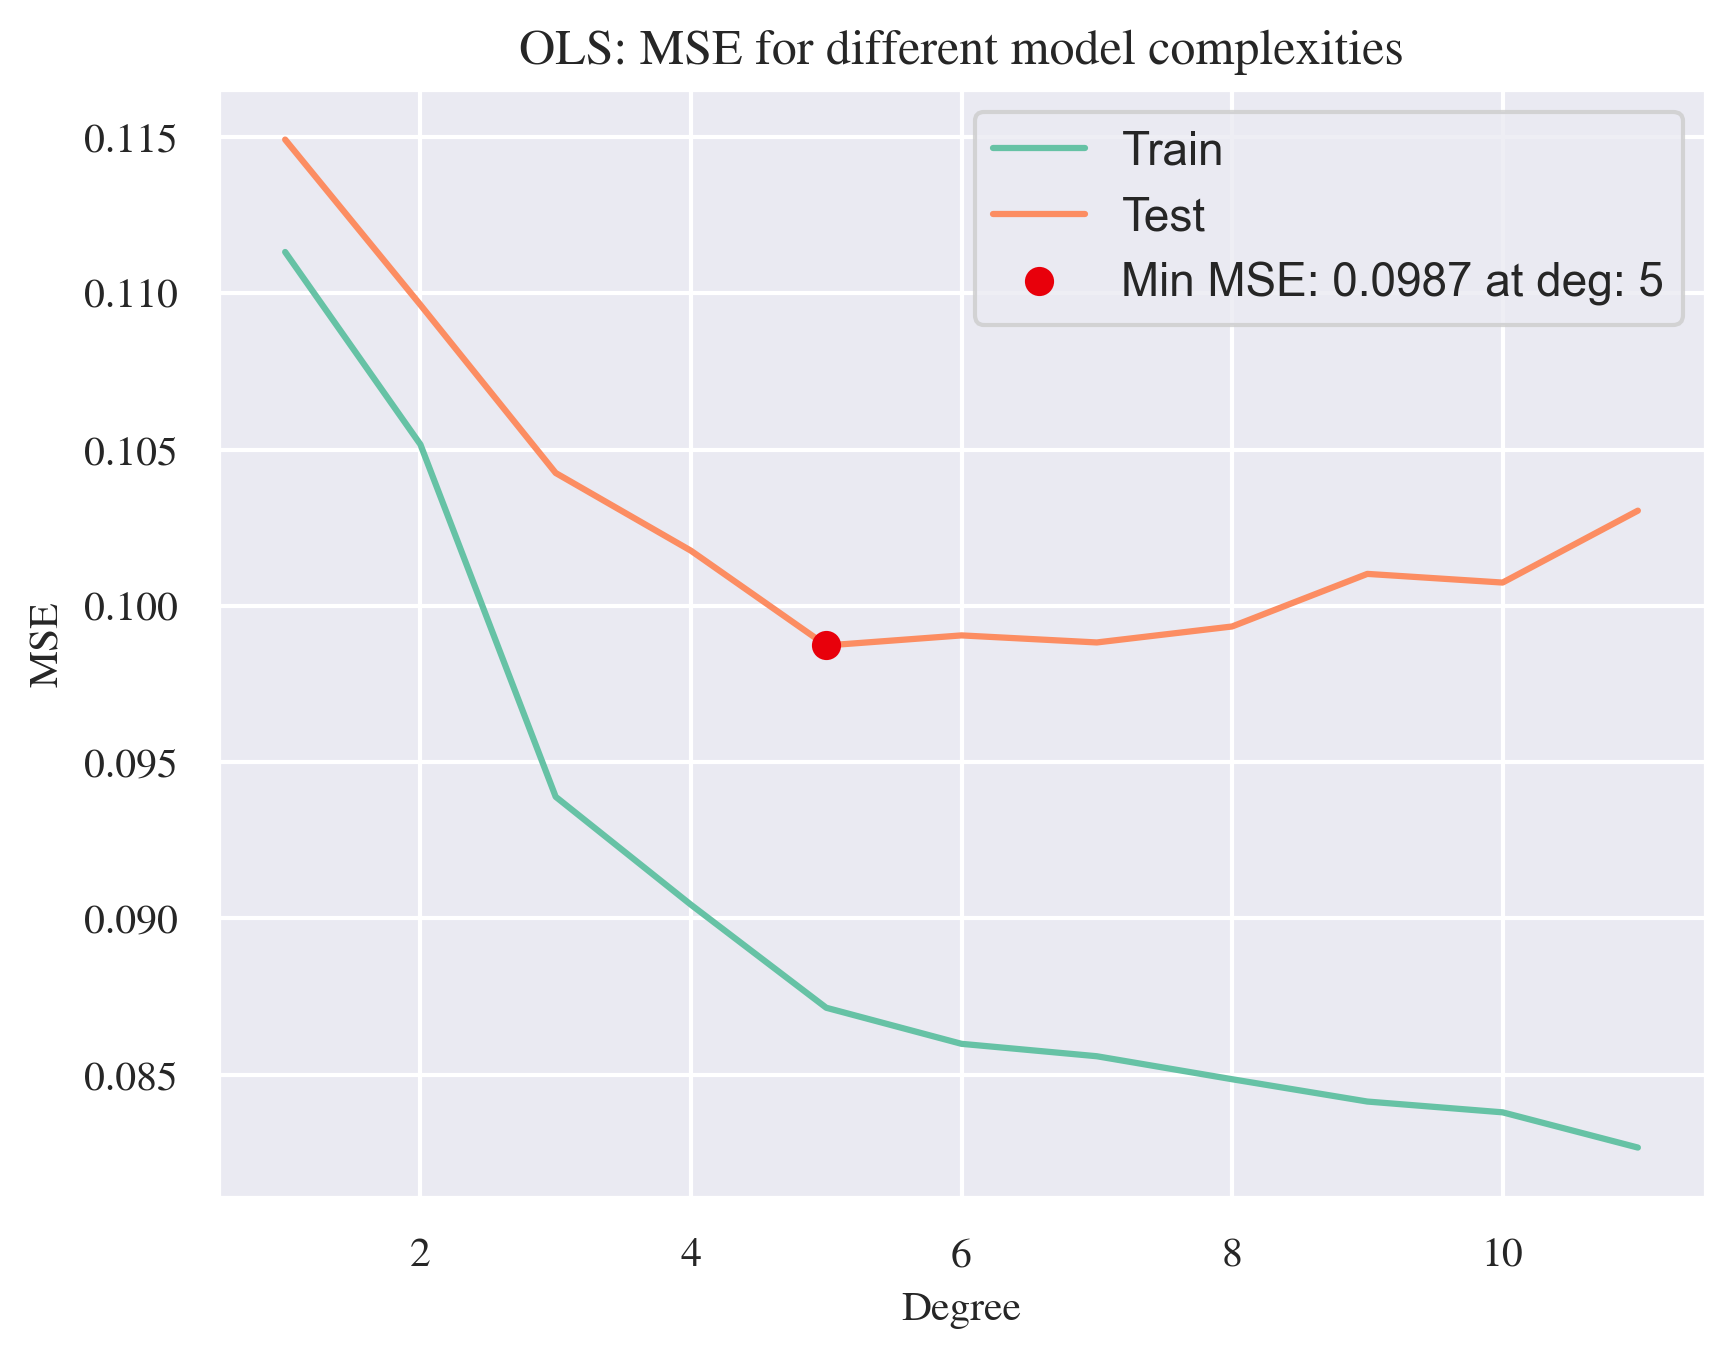

In [17]:
plots.plot_MSE_R2(y_axis="MSE", max_deg=11)
plt.savefig("../figures/figures_in_report/OLS_MSE_Franke_Noise.pdf") 

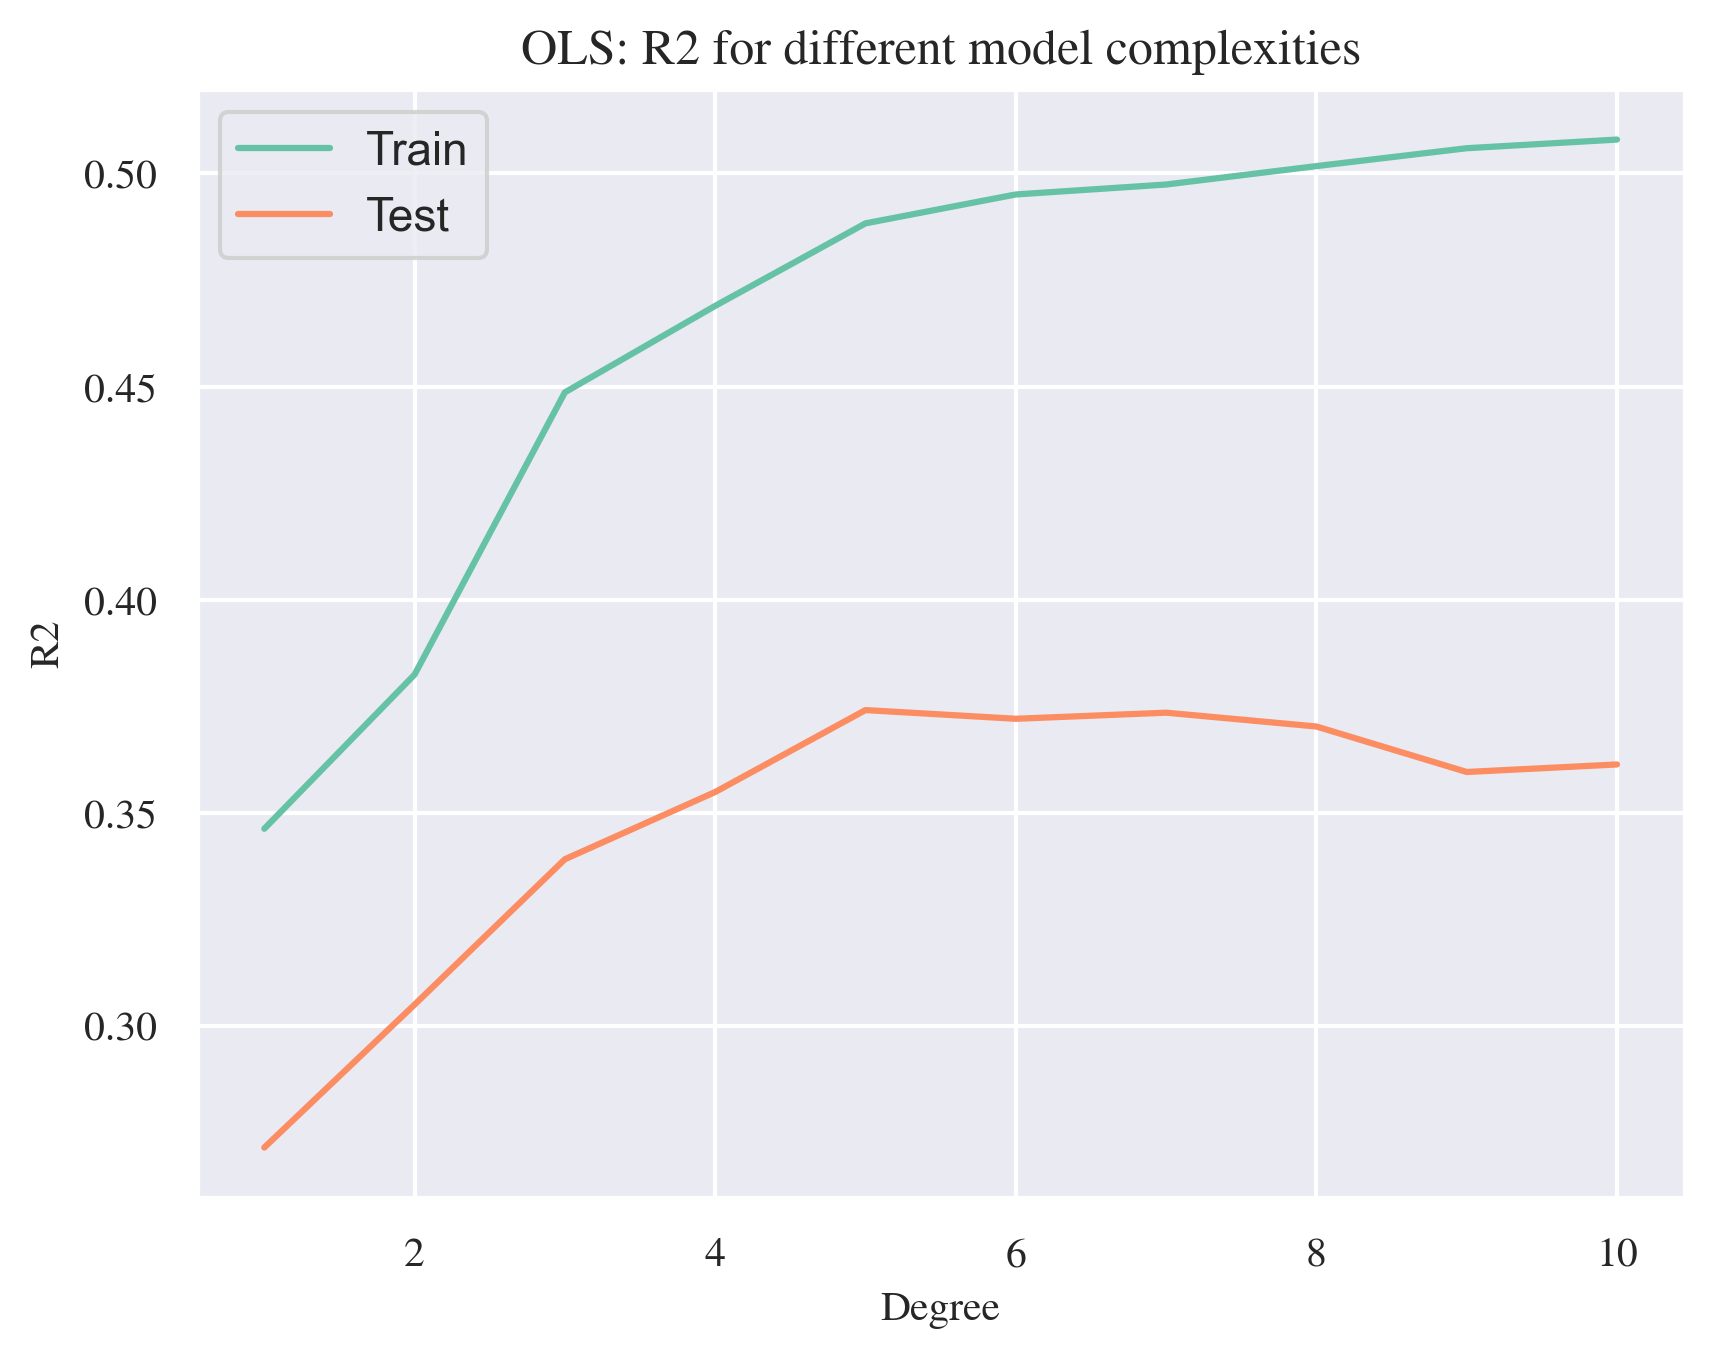

In [9]:
plots.plot_MSE_R2(y_axis="R2")
plt.savefig("../figures/figures_in_report/OLS_R2_Franke_Noise.pdf")

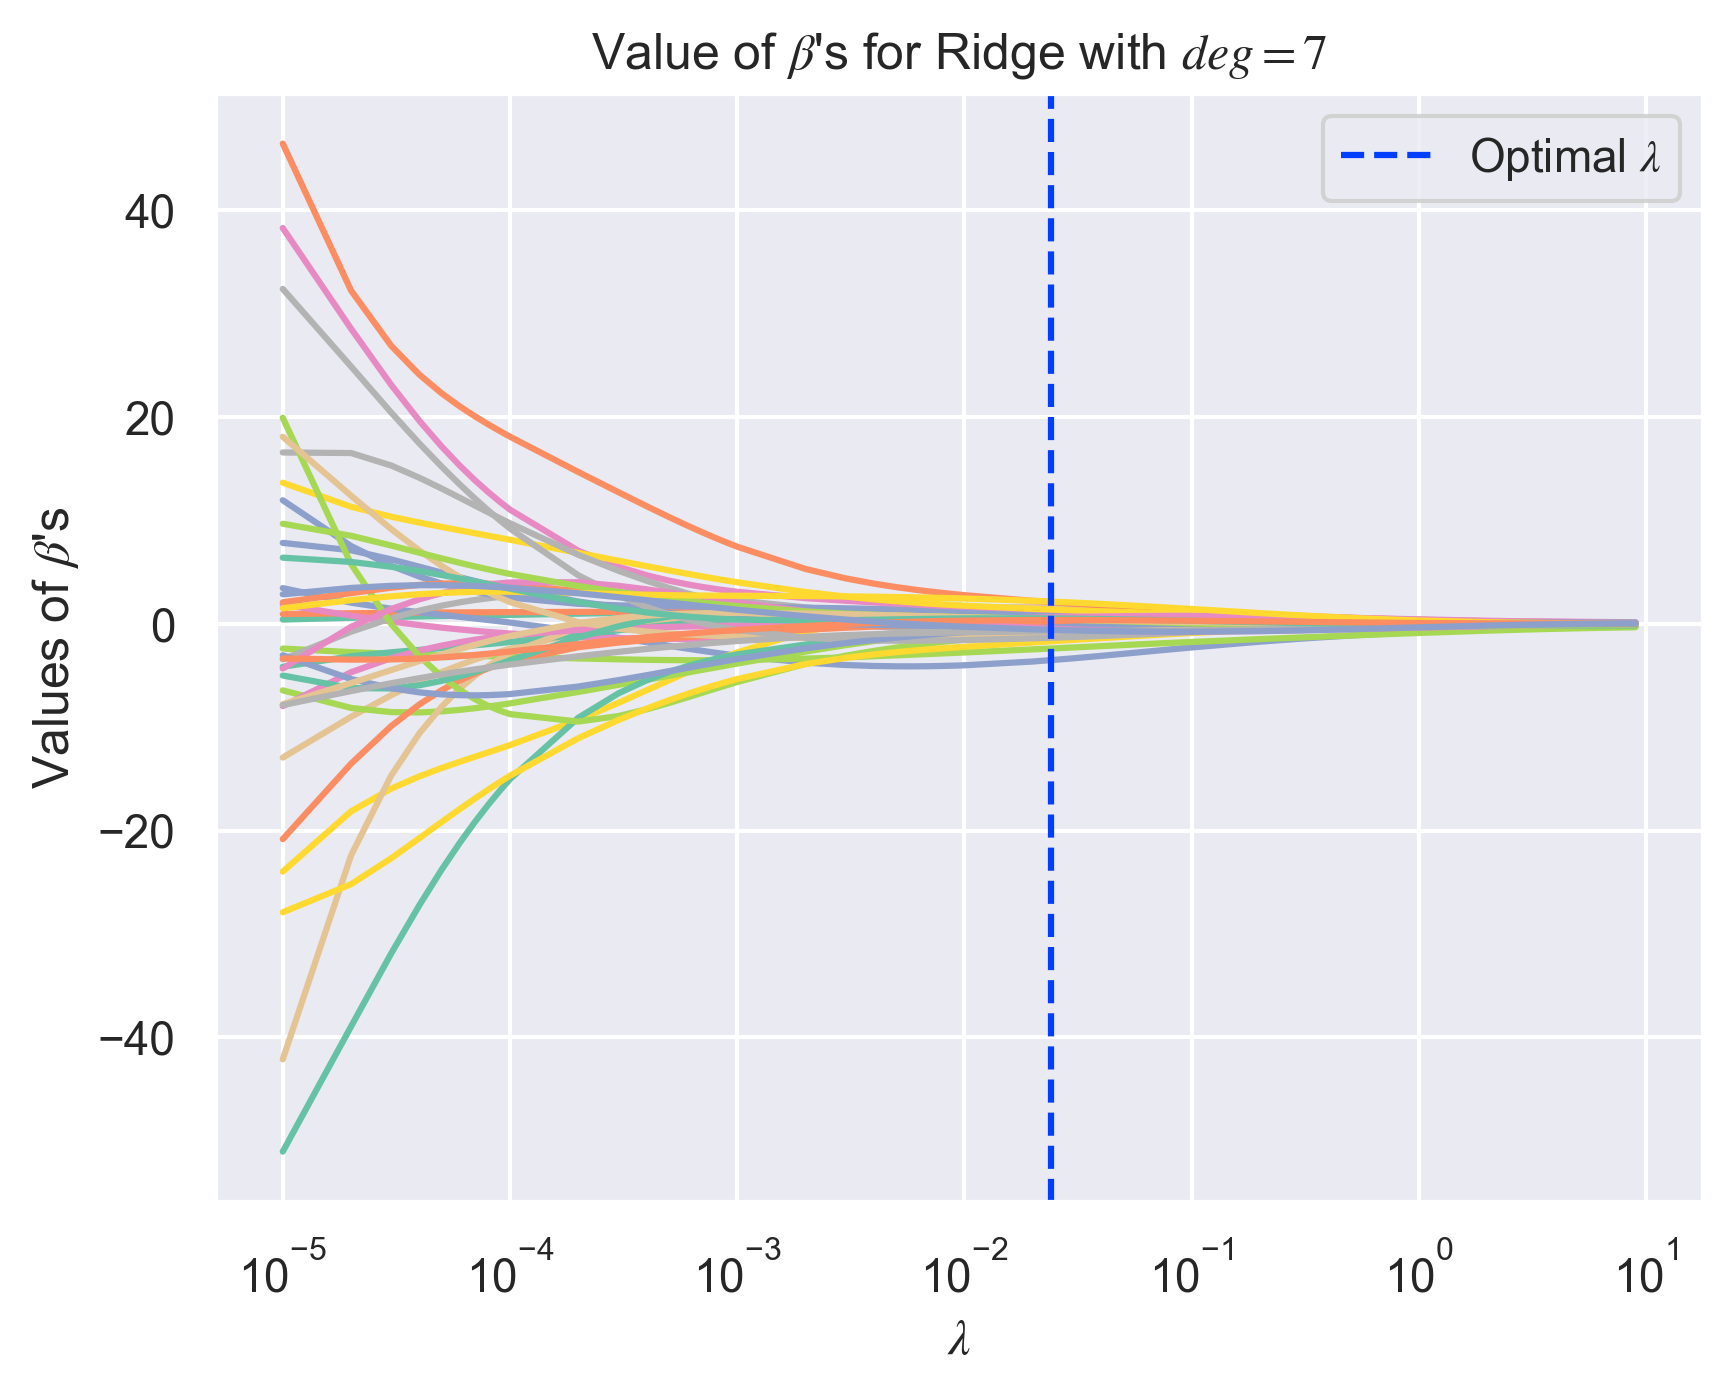

In [10]:
plots.plot_betas_lambda("Ridge", deg=best_deg_ridge, opt_lambda=best_lambda_ridge)
plt.savefig("../figures/figures_in_report/Ridge_Betas_lambda_Franke_Noise_const_deg.pdf")

/Users/miamerlid/anaconda3/envs/fysstk/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.644e+02, tolerance: 4.458e-02
  model = cd_fast.enet_coordinate_descent(
/Users/miamerlid/anaconda3/envs/fysstk/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.594e+02, tolerance: 4.458e-02
  model = cd_fast.enet_coordinate_descent(
/Users/miamerlid/anaconda3/envs/fysstk/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

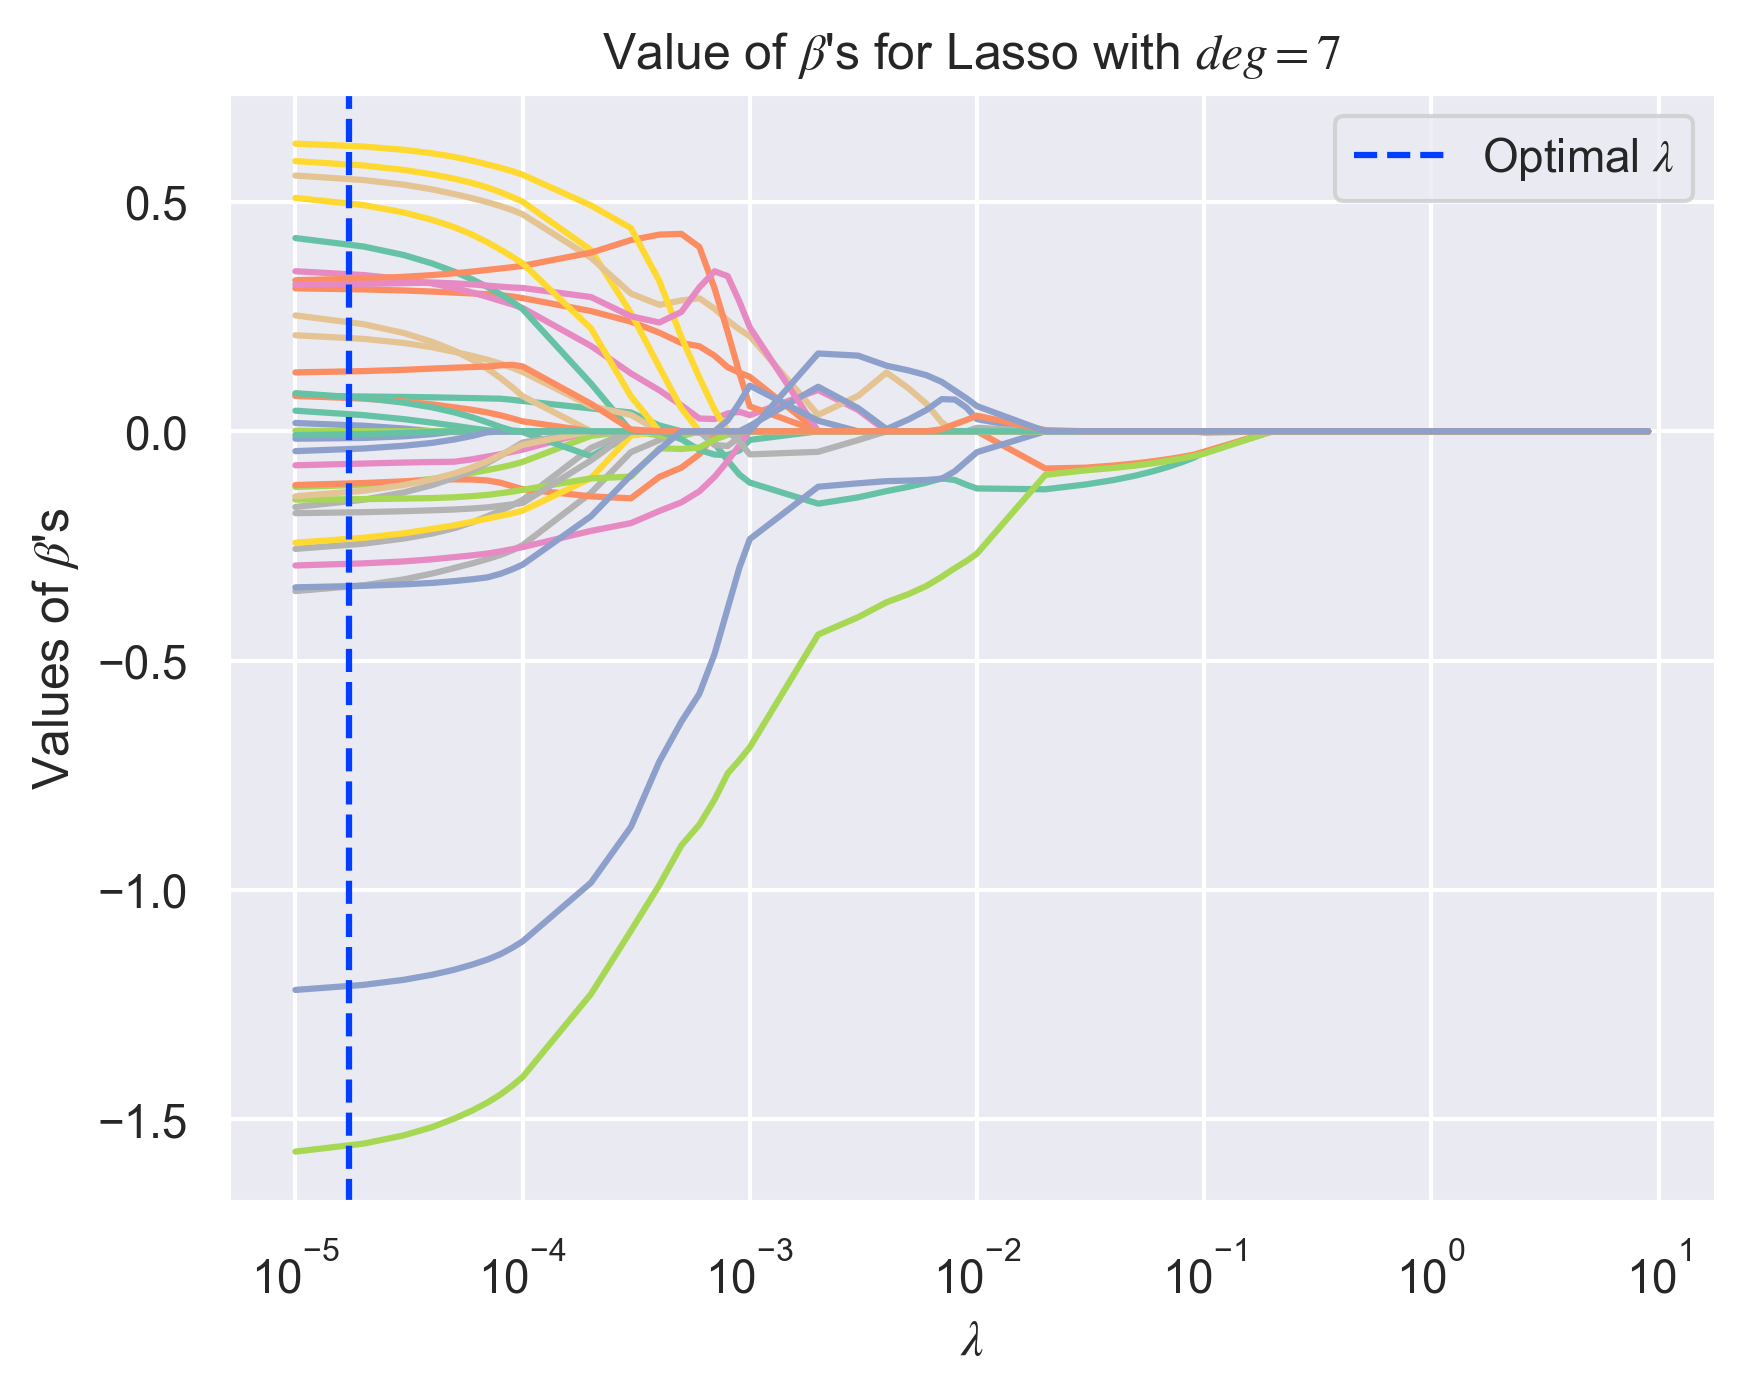

In [11]:
plots.plot_betas_lambda("Lasso", deg=best_deg_lasso, opt_lambda=best_lambda_lasso)
plt.savefig("../figures/figures_in_report/lasso_Betas_lambda_Franke_Noise_const_deg.pdf")

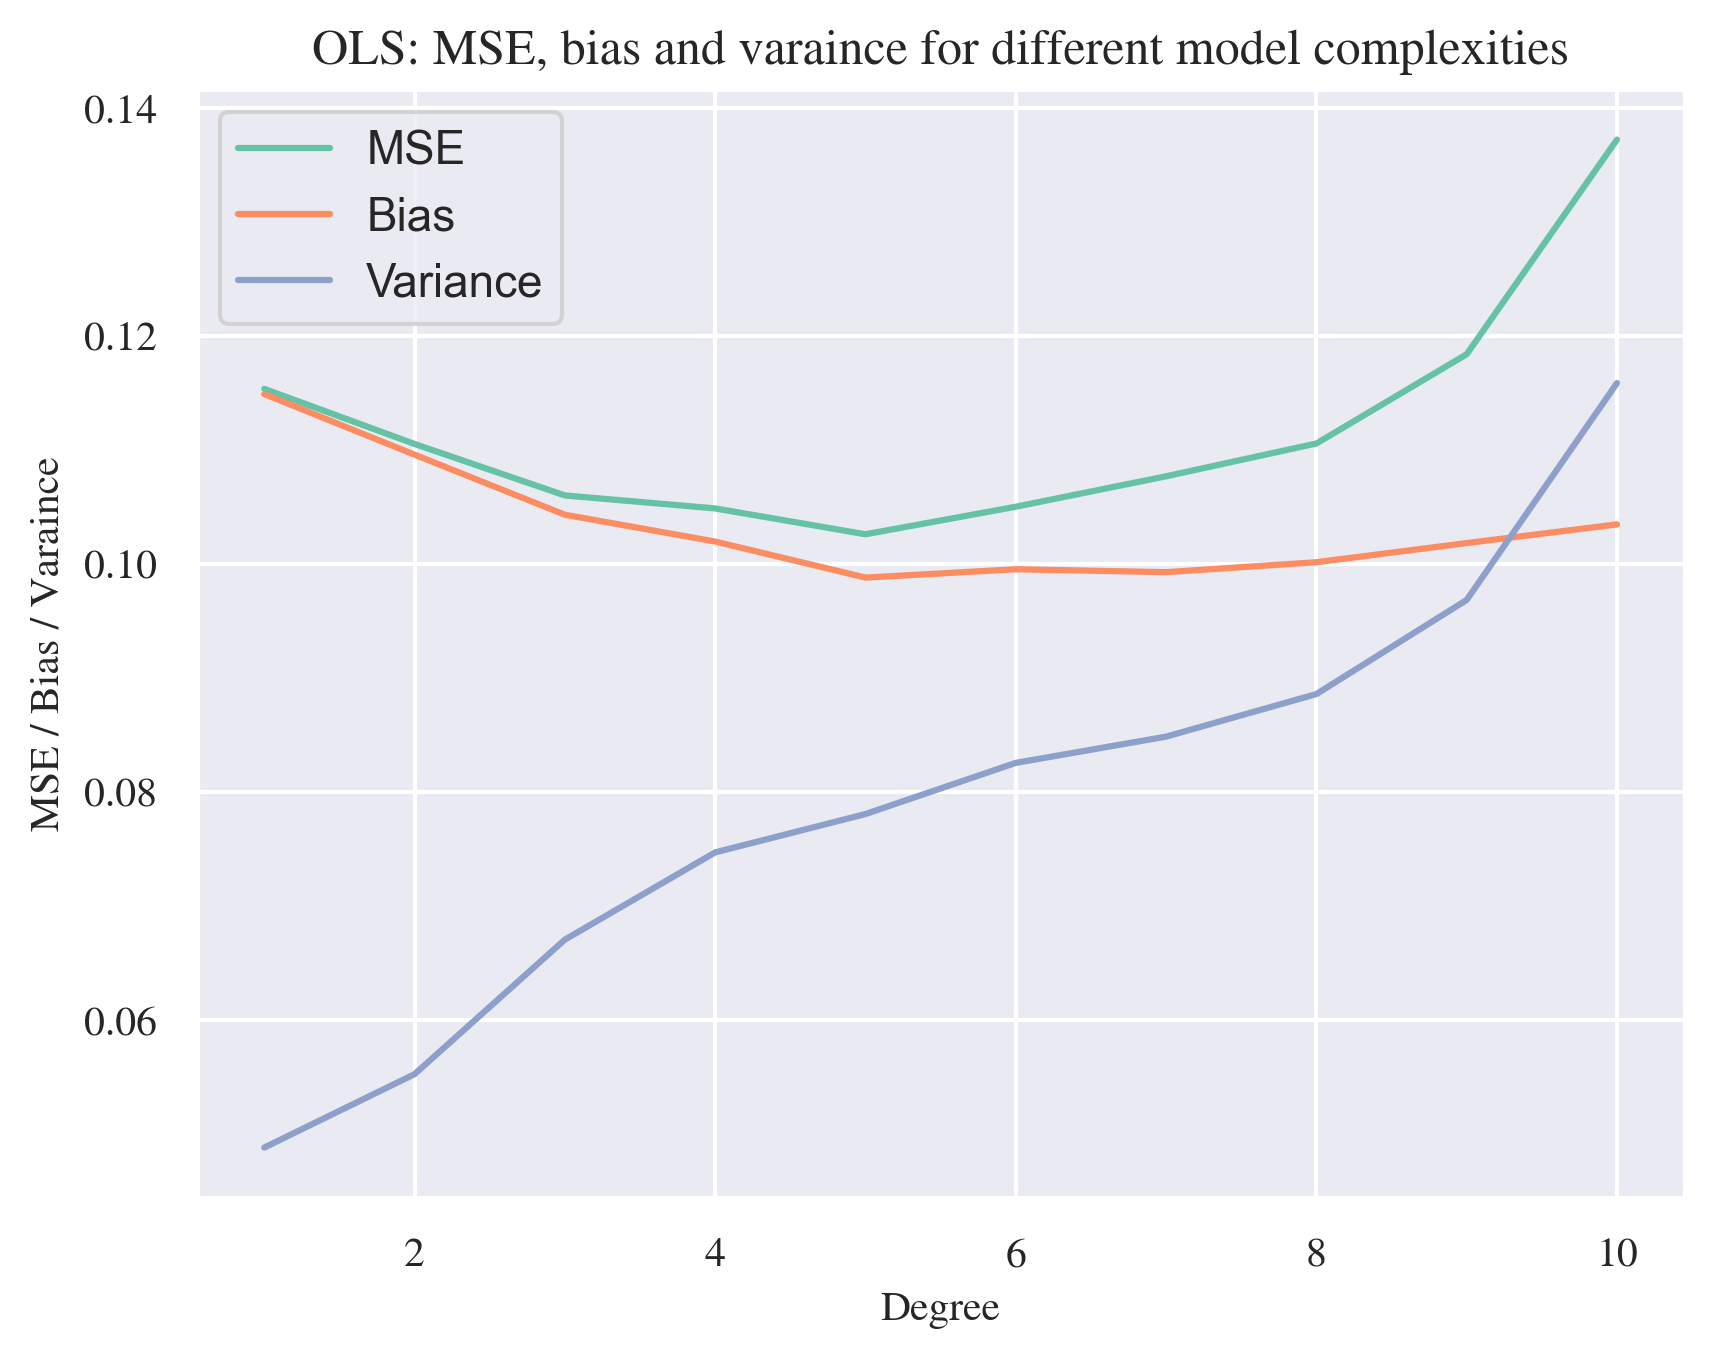

In [12]:
plots.plot_bootstrap_bias_var(max_deg=10)
plt.savefig("../figures/figures_in_report/bias_var_Franke_Noise_bootstrap.pdf")

### Terrain data

In [13]:
plots_terrain = Plotting(data_points=data_points, data="Terrain", seed=12)

/Users/miamerlid/anaconda3/envs/fysstk/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.052e+09, tolerance: 2.120e+05
  model = cd_fast.enet_coordinate_descent(
/Users/miamerlid/anaconda3/envs/fysstk/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.050e+09, tolerance: 2.121e+05
  model = cd_fast.enet_coordinate_descent(
/Users/miamerlid/anaconda3/envs/fysstk/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

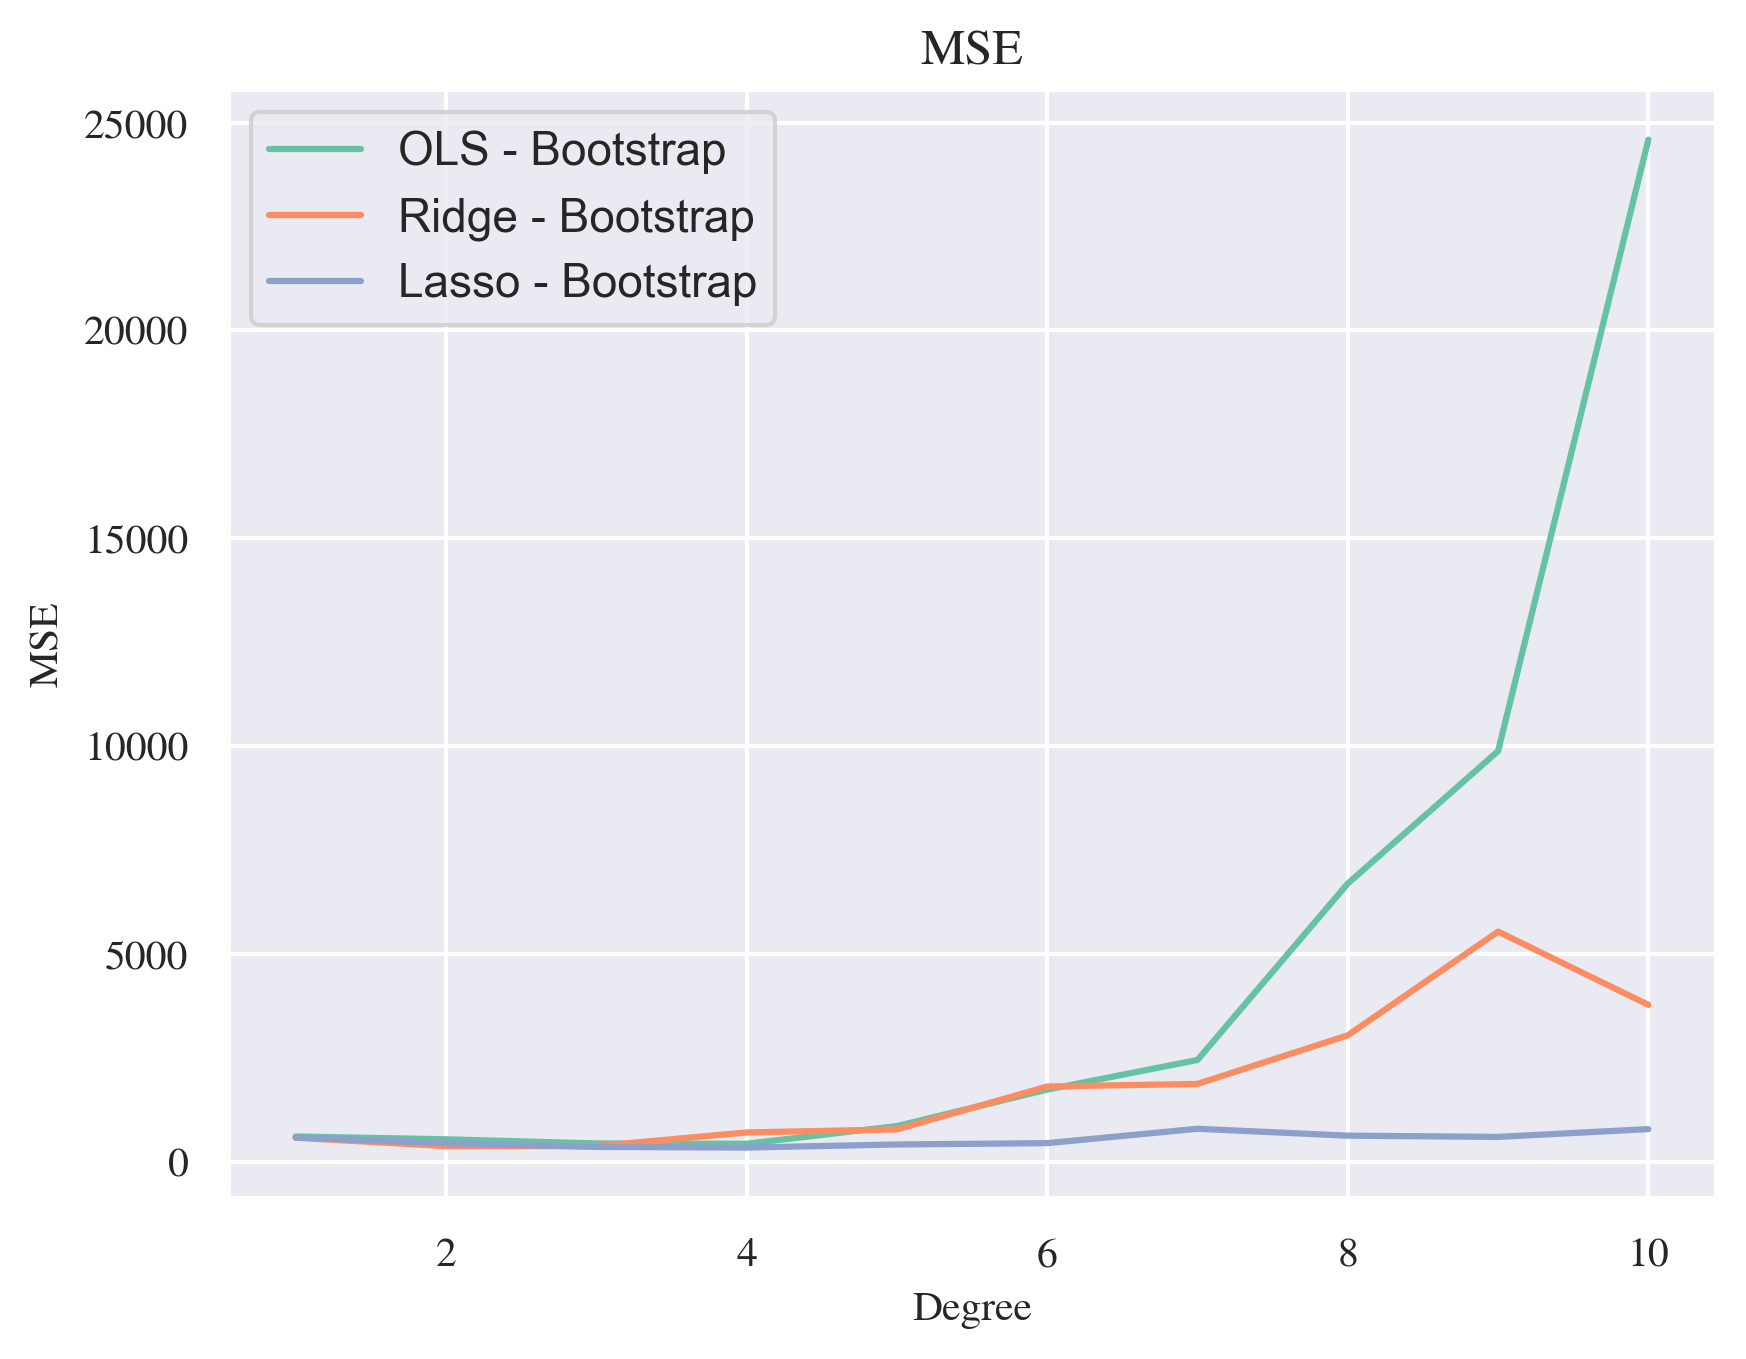

In [14]:
plots_terrain.plot_all_boot(ridge_lambda=best_lambda_ridge_terrain, lasso_lambda=best_lambda_lasso_terrain, max_degree=10, n_samples=100)
plt.savefig("../figures/figures_in_report/All_bootstrap_Terrain.pdf")

/Users/miamerlid/anaconda3/envs/fysstk/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.177e+09, tolerance: 2.389e+05
  model = cd_fast.enet_coordinate_descent(
/Users/miamerlid/anaconda3/envs/fysstk/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.179e+09, tolerance: 2.390e+05
  model = cd_fast.enet_coordinate_descent(
/Users/miamerlid/anaconda3/envs/fysstk/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

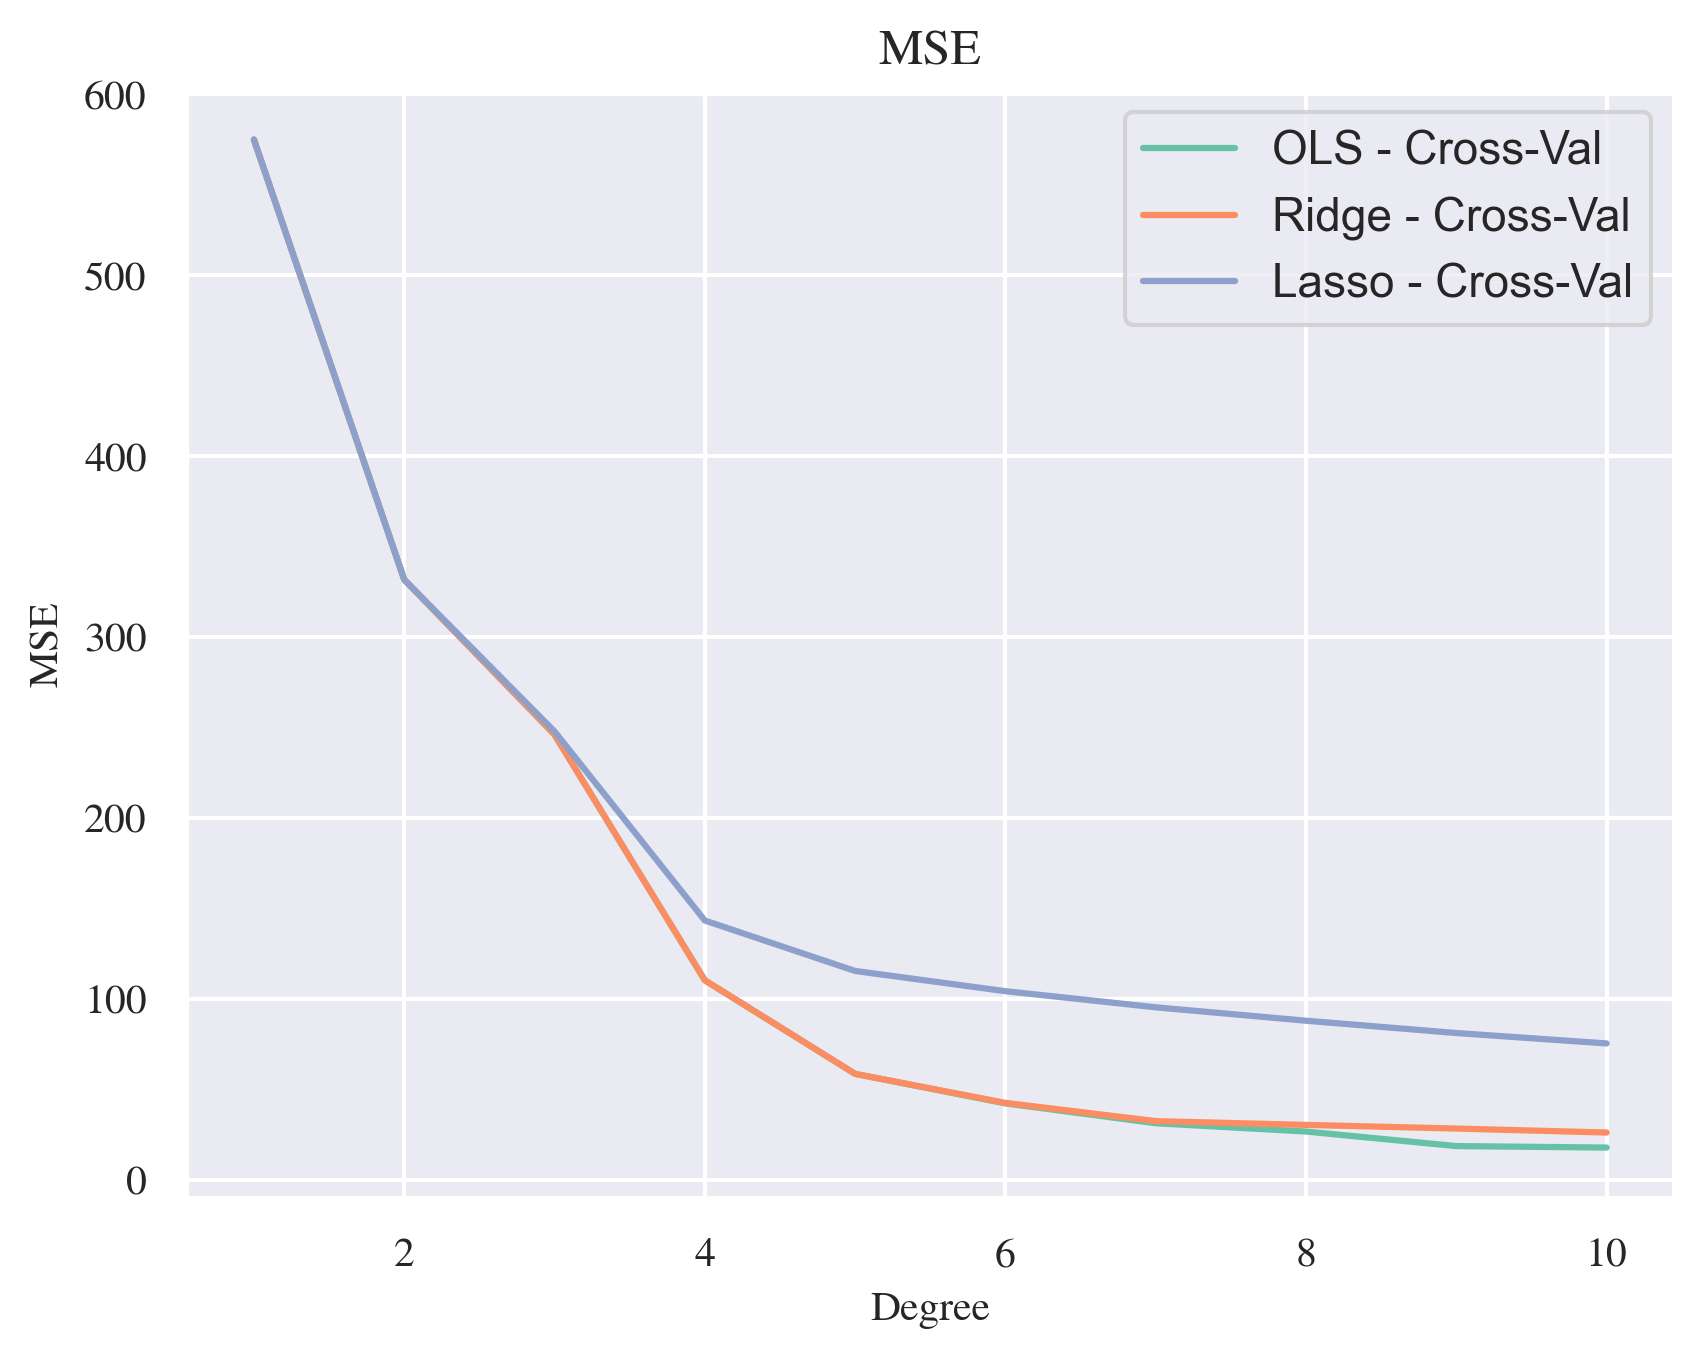

In [15]:
plots_terrain.plot_all_cv(ridge_lambda=best_lambda_ridge_terrain, lasso_lambda=best_lambda_lasso_terrain, max_degree=10, k_folds=10)
plt.savefig("../figures/figures_in_report/All_Terrain_CV_k10.pdf")

/Users/miamerlid/anaconda3/envs/fysstk/lib/python3.12/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/miamerlid/anaconda3/envs/fysstk/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/miamerlid/anaconda3/envs/fysstk/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.060e+09, tolerance: 2.122e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in s

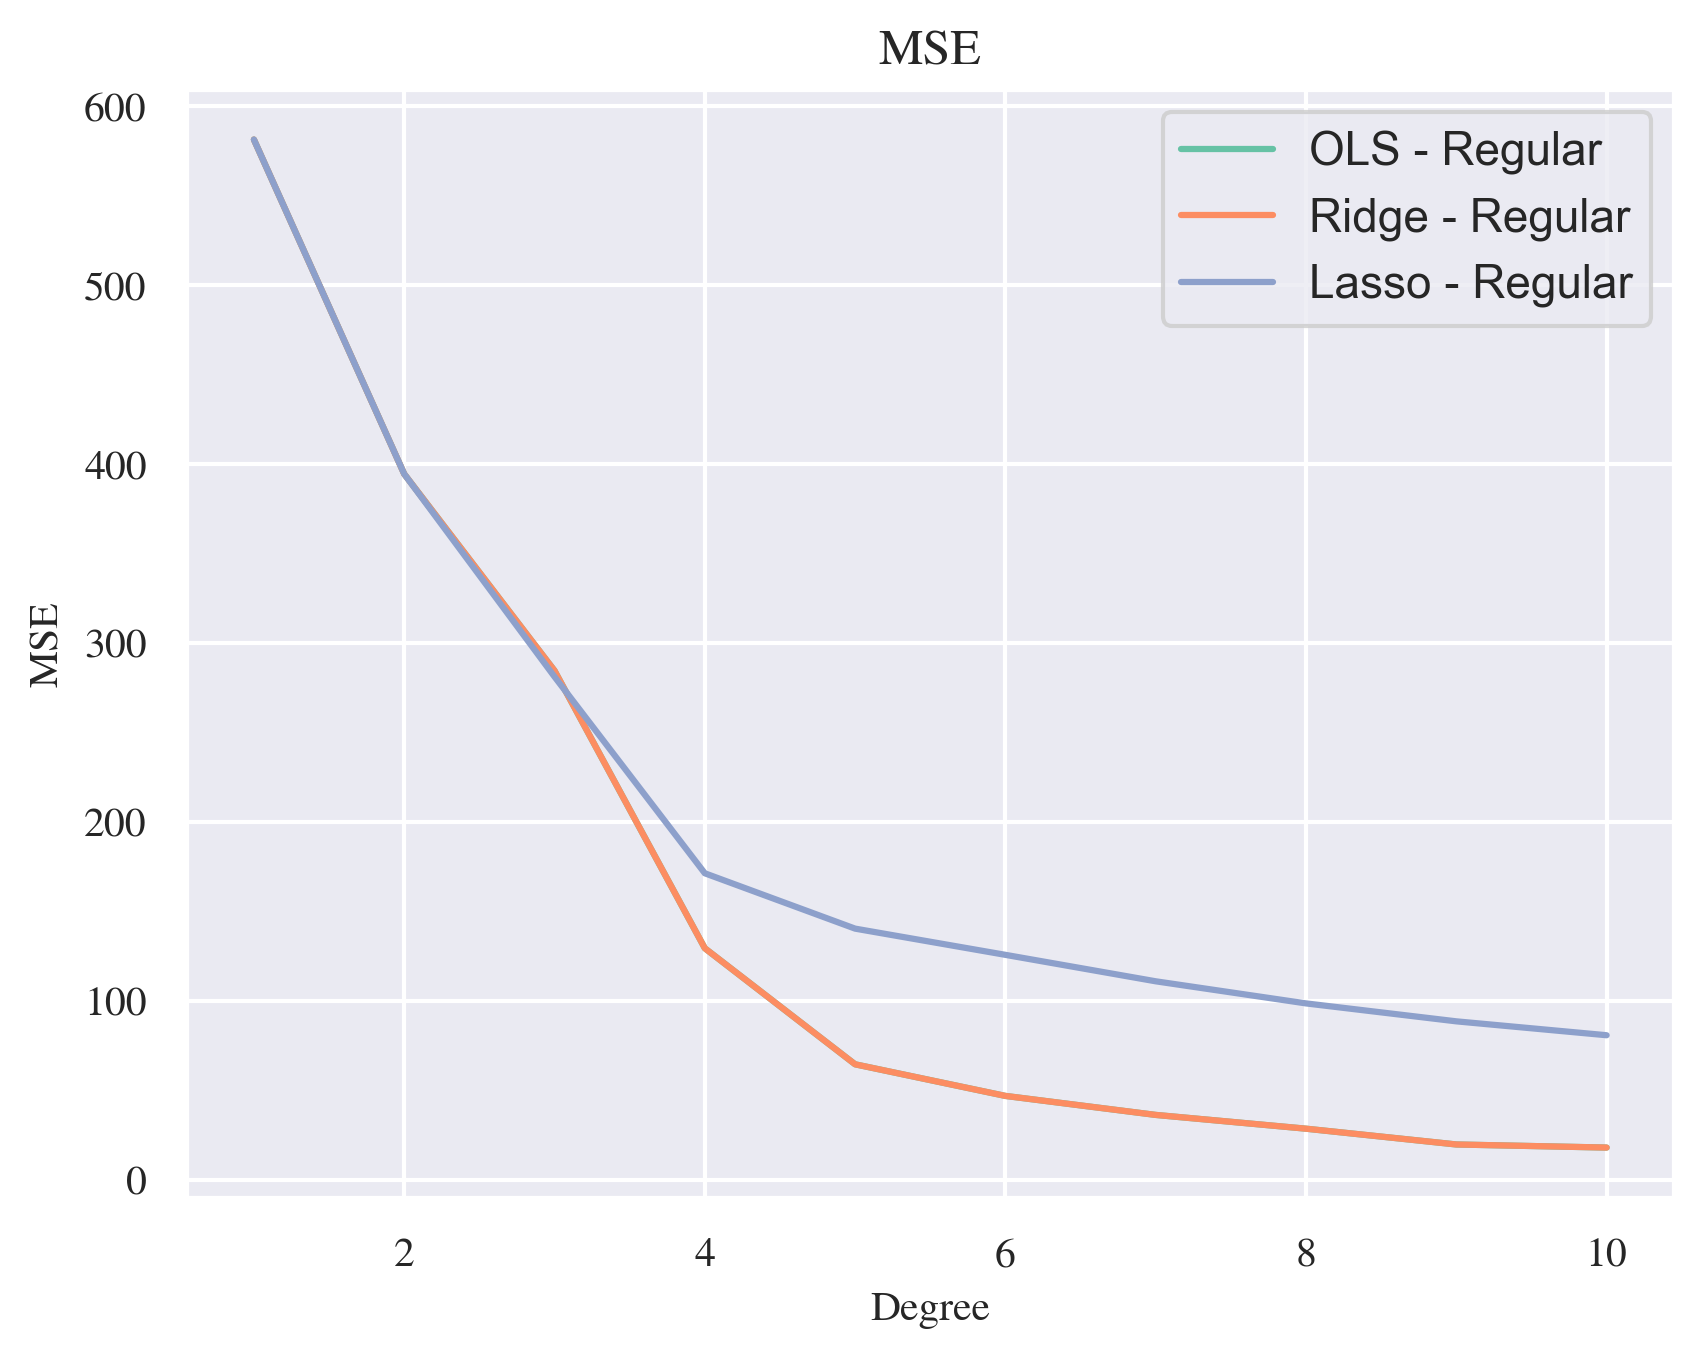

In [16]:
plots_terrain.plot_all_ols(max_degree=10)
plt.savefig("../figures/figures_in_report/All_Terrain_OLS.pdf")